* 필요한 함수들 import

In [2]:
import pandas as pd
import re
from ekonlpy.sentiment import MPCK
mp_clean = pd.read_csv('mp_clean.csv')

# I. get score(논문 저자들이 사용한 함수)와 비교

In [3]:
from ekonlpy.sentiment import MPKO
mpko = MPKO()

#각 문장의 어조 csv추출
neg_dic = pd.read_csv('close_neg_dic.csv', encoding = 'utf-8')
pos_dic = pd.read_csv('close_pos_dic.csv', encoding = 'utf-8')

#부정사전 리스트(금리 인하, Dovish)
negative_list = []
for i in range(len(neg_dic)):
    negative_list.append(neg_dic['ngram'][i])
    
#긍정사전 리스트(금리 인상, Hawkish)
positive_list = []
for i in range(len(pos_dic)):
    positive_list.append(pos_dic['ngram'][i])
    
#어조 분석
tone_list2 = [] #각 의사록별 톤 리스트 도출

for i in range(len(mp_total)): #각 의사록
    negative_sentence = 0
    positive_sentence = 0
    for j in range(len(mp_total[i])): #각 문장 -> 문장의 sentence_tone을 도출
        text = mp_total[i][j]
        tokens = mpko.tokenize(text)  
        sentence_tone = mpko.get_score(tokens)['Polarity']
        if sentence_tone > 0:
            positive_sentence += 1
        elif sentence_tone < 0:
            negative_sentence += 1
        else:
            pass
    try:
        document_tone = (positive_sentence - negative_sentence) / (positive_sentence + negative_sentence)
        tone_list2.append(document_tone)
    except:
        document_tone = 0  #각 의사록별 document_tone을 도출
        tone_list2.append(document_tone)



FileNotFoundError: [Errno 2] No such file or directory: 'close_neg_dic.csv'

In [ ]:
mp_tone2 = pd.DataFrame(index=range(0,len(mp_clean)), columns=['date','TONE-Doc'])                      
mp_tone2['date'] = mp_clean['date']
mp_tone2['TONE-Doc'] = tone_list2
mp_tone2 = pd.merge(mp_tone2,base_rate, on='date',how='left')
mp_tone2

In [ ]:
corr = mp_tone2.corr()
print(corr)

In [ ]:
# 기준금리와, tone 의 시계열 꺾은선 그래프

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 10)

x = mp_tone2['date']
y1 = mp_tone2['TONE-Doc']
y2 = mp_tone2['baserate']
fig, ax1 = plt.subplots()
ax1.plot(x, y1, color='blue')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='red')

plt.xticks(rotation=70)
plt.show()

# II. 긍정사전, 부정사전의 시각화

In [ ]:
#  wordcloud 함수 다운로드

# !pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [40]:
# 사전 불러와서, 단어 뒤에 붙어있는 태그 삭제 (ex. /NNP )

pos_dic = pd.read_csv("close_pos_dic.csv", encoding = "utf-8")
neg_dic = pd.read_csv("close_neg_dic.csv", encoding = "utf-8")

for i in range(len(pos_dic)):
    pos_dic['ngram'][i]=re.sub(r"/.*", "",pos_dic['ngram'][i])
    
for i in range(len(neg_dic)):
    neg_dic['ngram'][i]=re.sub(r"/.*", "",neg_dic['ngram'][i])

In [1]:
# 사전의 단어(key)와 나온 빈도수(value)를 dictionary 형태로 바꿔줌

pos_dictionary ={}
for i in range(len(pos_dic)):
    pos_dictionary[pos_dic['ngram'][i]]=pos_dic['close_up_count'][i]


NameError: name 'pos_dic' is not defined

In [47]:
# 긍정사전 시각화 프린트

wc= WordCloud(font_path='‪C:\Windows\Fonts\H2GPRM.TTF', background_color='white').generate_from_frequencies(pos_dictionary)
plt.figure(figsize=(22,22))
plt.imshow(wc, interpolation='lanczos')
plt.axis('off')
plt.show()

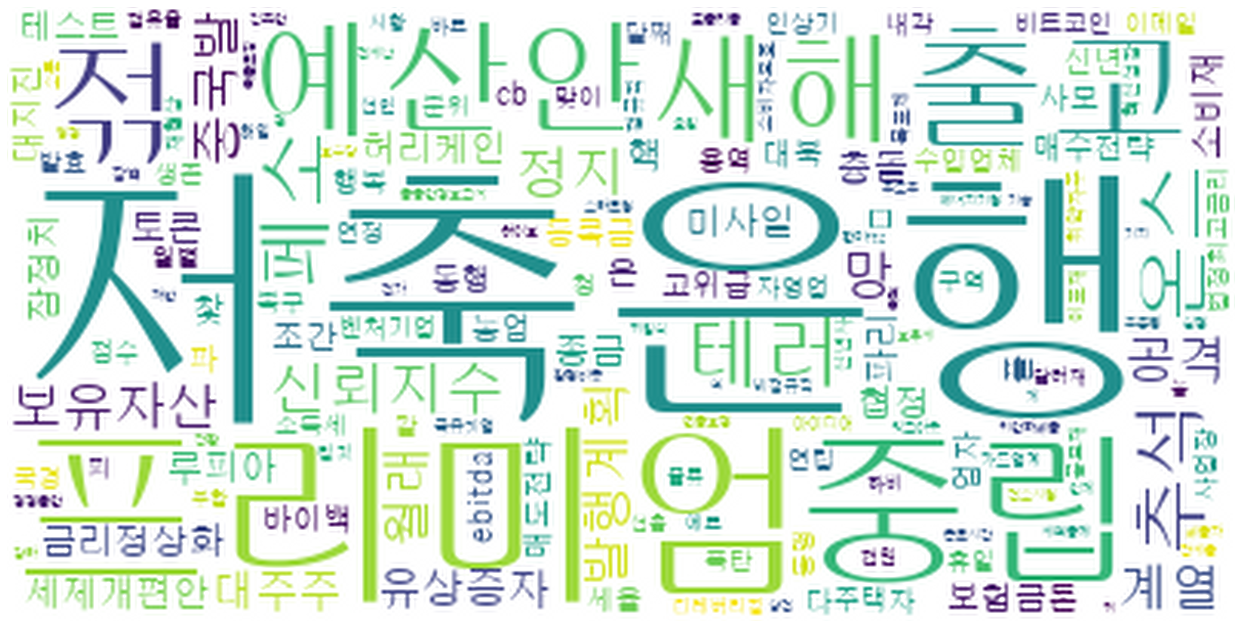

In [50]:
# 사전의 단어(key)와 나온 빈도수(value)를 dictionary 형태로 바꿔줌
    
neg_dictionary ={}

for i in range(len(neg_dic)):
    neg_dictionary[neg_dic['ngram'][i]]=neg_dic['close_down_count'][i]


C:\Users\720\anaconda3\envs\study\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


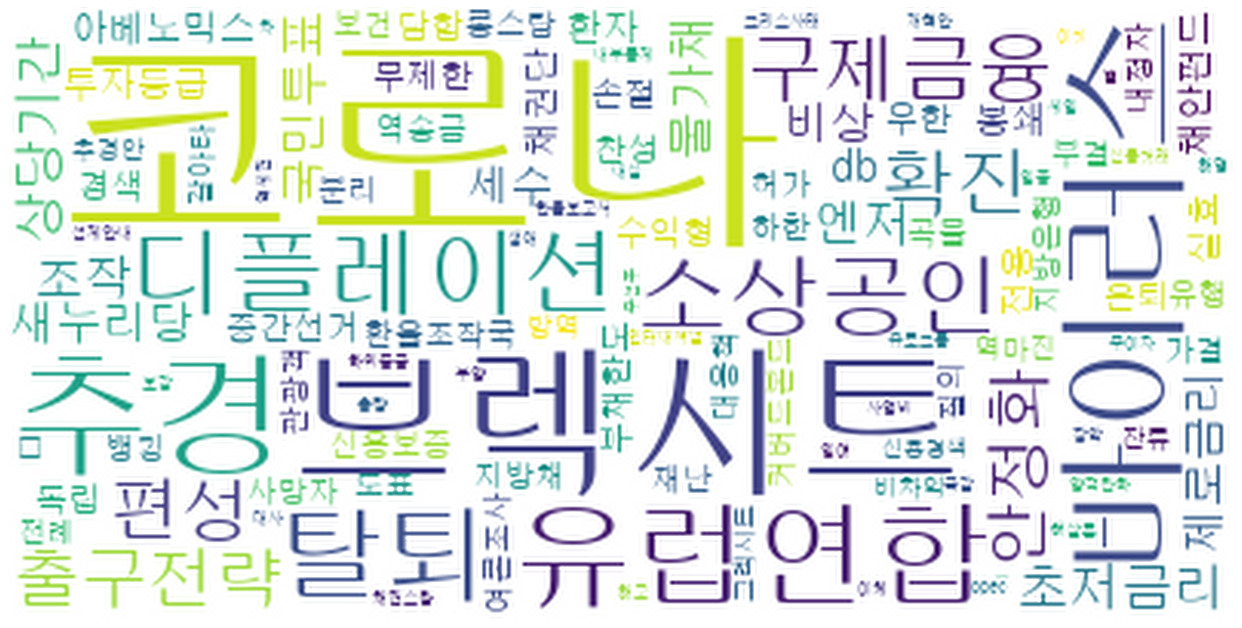

In [51]:
# 부정사전 시각화 프린트

wc= WordCloud(font_path='‪C:\Windows\Fonts\H2GPRM.TTF', background_color='white').generate_from_frequencies(neg_dictionary)

plt.figure(figsize=(22,22))
plt.imshow(wc, interpolation='lanczos')
plt.axis('off')
plt.show()